<a href="https://colab.research.google.com/github/brit228/DS-Sprint-02-Storytelling-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


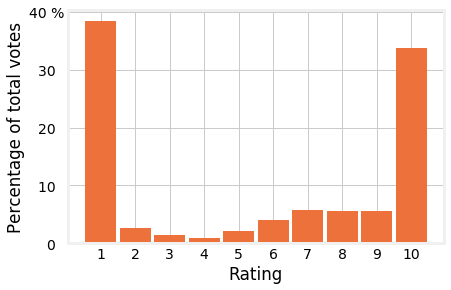

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv'

df = pd.read_csv(url)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values('timestamp')

values = []
labels = []

for i in range(1,11):
  values.append(df[df["category"] == "IMDb users"]["{}_pct".format(i)].values[-1])
  labels.append(i)

plt.style.use('fivethirtyeight')  

fig = plt.figure()
fig.patch.set_facecolor('white')

ax = fig.add_subplot(1,1,1)
ax.bar([i for i in range(1,11)], values, color="#EC713B", width=0.9)
ax.set_xlabel("Rating")
ax.set_ylabel("Percentage of total votes")
ax.set_facecolor('white')
ax.set_xticks([i for i in range(1,11)])

yt = [str(i)+"  " for i in range(0,41,10)]
yt[-1] = yt[-1][:-1] + "%"

ax.set_yticklabels(yt)

plt.show()

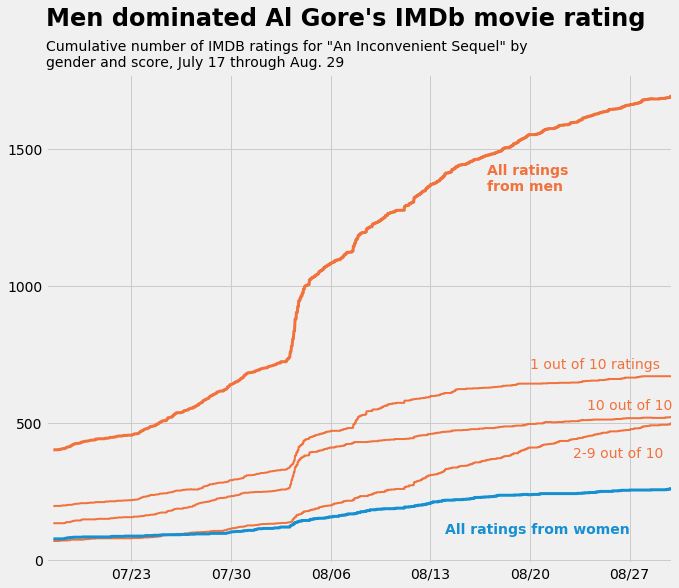

In [168]:
import matplotlib.dates as mdates
from matplotlib.dates import SU
import datetime

df["2-9"] = 0
for i in range(2,10):
  df["2-9"] += df["{}_votes".format(i)]
  
men = df[df["category"] == "Males"]
women = df[df["category"] == "Females"]

lw = 2.0
lw2 = 3.0

plt.style.use('fivethirtyeight')

ax = men.plot('timestamp', 'respondents', color="#f0723d", linewidth=lw2, legend=False, figsize=(10,10))
ax.plot(men['timestamp'], men['1_votes'], color="#f0723d", linewidth=lw)
ax.plot(men['timestamp'], men['2-9'], color="#f0723d", linewidth=lw)
ax.plot(men['timestamp'], men['10_votes'], color="#f0723d", linewidth=lw)
ax.plot(women['timestamp'], women['respondents'], color='#1790d2', linewidth=lw2)

ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=0, horizontalalignment='center')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=SU))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.set_xlim([datetime.date(2017, 7, 17), datetime.date(2017, 8, 30)])

ax.set_yticks([i for i in range(0,1600,500)])

ax.set_xlabel("")
ax.text(datetime.date(2017, 7, 17), 1950, "Men dominated Al Gore's IMDb movie rating", fontsize=24, weight='bold')
ax.text(datetime.date(2017, 7, 17), 1800, 'Cumulative number of IMDB ratings for "An Inconvenient Sequel" by\ngender and score, July 17 through Aug. 29')
ax.text(datetime.date(2017, 8, 17), 1350, "All ratings\nfrom men", color='#f0723d', weight='bold')
ax.text(datetime.date(2017, 8, 20), 700, "1 out of 10 ratings", color='#f0723d')
ax.text(datetime.date(2017, 8, 24), 550, "10 out of 10", color='#f0723d')
ax.text(datetime.date(2017, 8, 23), 375, "2-9 out of 10", color='#f0723d')
ax.text(datetime.date(2017, 8, 14), 100, "All ratings from women", color="#1790d2", weight='bold')

ax;